<a href="https://colab.research.google.com/github/wsbiii/Deep-Learning/blob/main/TensorFlow_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Linear Classificaition
---
Use numeric variable to predict a binary variable

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


Load Data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

EDA

In [3]:
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# data attribute returns the input data
data.data.shape

(569, 30)

In [6]:
# target variables train data classifications
#  0s and 1s
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# target variable values
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# target shape
data.target.shape

(569,)

In [9]:
# Return feature/predictor variables
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Analysis

### Train/Test Split

In [10]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [11]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### TensorFlow

In [12]:
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Another methods [test efficiency by importing time]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5949 - loss: 0.8082 - val_accuracy: 0.5266 - val_loss: 0.8029
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5976 - loss: 0.7358 - val_accuracy: 0.5691 - val_loss: 0.7357
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6969 - loss: 0.6826 - val_accuracy: 0.6330 - val_loss: 0.6762
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7300 - loss: 0.6269 - val_accuracy: 0.6755 - val_loss: 0.6260
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8060 - loss: 0.5235 - val_accuracy: 0.7340 - val_loss: 0.5823
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8106 - loss: 0.5188 - val_accuracy: 0.7553 - val_loss: 0.5452
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8254 - loss: 0.5191 - val_accuracy: 0.7660 - val_loss: 0.5127
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8608 - loss: 0.4766 - val_accuracy: 0.7

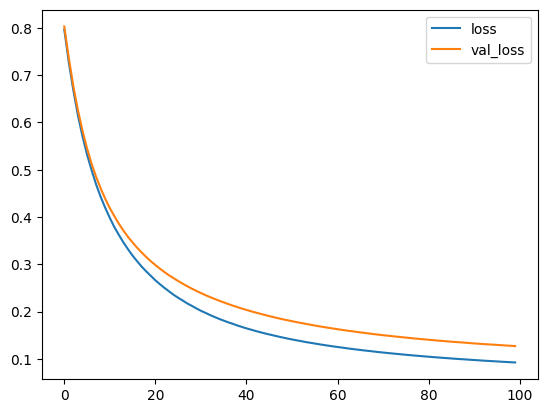

In [22]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

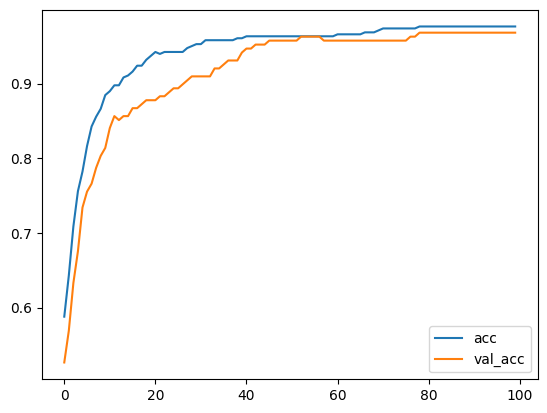

In [14]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Predictions

In [15]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[1.0743965e-02]
 [1.4635173e-04]
 [1.2544386e-02]
 [8.2592644e-02]
 [5.4192339e-04]
 [9.9226308e-01]
 [8.6447573e-01]
 [9.8714864e-01]
 [1.2363978e-05]
 [6.1371219e-01]
 [7.7502245e-01]
 [7.3850530e-01]
 [1.6035774e-01]
 [9.9537975e-01]
 [5.0591660e-01]
 [2.0641522e-02]
 [8.1153685e-01]
 [7.2908413e-04]
 [5.4186779e-01]
 [9.9378330e-01]
 [9.9263120e-01]
 [4.8642689e-01]
 [5.8242530e-03]
 [1.7435499e-02]
 [4.6929759e-01]
 [1.1628184e-02]
 [1.0353366e-01]
 [9.7651863e-01]
 [7.5722499e-05]
 [9.9616283e-01]
 [9.6399087e-01]
 [5.7518221e-03]
 [7.6007031e-02]
 [9.9679315e-01]
 [6.3867110e-01]
 [6.6307265e-01]
 [9.0448105e-01]
 [2.0231385e-02]
 [9.9800867e-01]
 [9.9976003e-01]
 [9.9728233e-01]
 [1.6472887e-02]
 [2.5351673e-01]
 [9.8413718e-01]
 [2.8338102e-01]
 [4.1514661e-05]
 [9.7923392e-01]
 [9.9798155e-01]
 [7.9986174e-03]
 [5.8295153e-11]
 [2.6580417e-01]
 [9.9776119e-01]
 [2.5307867e-01]
 [2.1986016e-03]
 [7.6074705e-02]
 [9.9805766e-01]
 [6.798362

In [16]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.]


In [17]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9680851063829787
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9574 - loss: 0.1658 
Evaluate output: [0.1272907704114914, 0.9680851101875305]


## Save and Load a Model

In [18]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [19]:
# Check that the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  18K Aug 26 12:24 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Aug 22 13:24 sample_data


In [20]:
# Load the model
# Keras: load/save only works if you DON'T use the Input() layer explicitly
# Define the model with ONLY Dense(1, input_shape=(D,))

model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9574 - loss: 0.1658  


[0.1272907704114914, 0.9680851101875305]

In [21]:
# Download the file
from google.colab import files
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>